## Project Overview
-  This project intended to serve as the capstone project for Udacity Data Science Nanodegree.
-  In this notebook I will cover the following structure :
    * Problem Statement
    * Metrics
    * Data Exploration
    * Visualization
    * Benchmark(Optional)
    * Data Preprocessing steps
    * Implementation
    * Refinement
    * Results
    * Justification
    * Reflection
    * Future Improvements
    
 You can find the blog post [here](https://medium.com/@azalamri3/predicting-flights-delays-using-machine-learning-bfe24999dee4)
 And the [Github repo here]()
 
 

## Problem Statment  
- Flights delay is an important issue in airports and affects individuals. In this project, I've tried to apply machine learning techniques to come with an analysis that helps us understand what root causes of delays and could data science help us with solving this issue.

## Data Exploration


In [1]:
# read the  data file 

In [2]:
import pandas as pd 

In [3]:
airport_data= pd.read_csv('Flights Data AUG17 - SEP17 v1.0.csv')
df = pd.DataFrame(airport_data)
df.head(-1)

,TERMINAL,AIRLINE_NAME,AIRLINE_CODE,FLIGHT_NUMBER,ARRIVAL_DEPARTURE,ARRIVAL_DEPARTURE_AIRPORT,DOMESTIC_INTERNATIONAL,SCHEDULED_TIME_ARR_DEP,ACTUAL_TIME_ARR_DEP,DALAY_EARLY_MIN,FLIGHT_STATUS,TOTAL_PASSENGERS
0,T2,SAUDI AIRLINES,SV,521,ARRIVAL,BAH - MANAMA - BAHRAIN,INTERNATIONAL,8-19-17 7:15 PM,8-19-17 6:58 PM,-17.0,ON-TIME,150
1,T2,SAUDI AIRLINES,SV,555,ARRIVAL,DXB - DUBAI - UNITED ARAB EMIRATES,INTERNATIONAL,8-19-17 7:15 PM,8-19-17 6:49 PM,-26.0,ON-TIME,263
2,T1,EMIRATES AIRLINE,EK,817,ARRIVAL,DXB - DUBAI - UNITED ARAB EMIRATES,INTERNATIONAL,8-19-17 7:35 PM,8-19-17 7:36 PM,1.0,DELAYED,360
3,T1,GULF AIR,GF,169,ARRIVAL,BAH - MANAMA - BAHRAIN,INTERNATIONAL,8-19-17 8:30 PM,8-19-17 8:14 PM,-16.0,ON-TIME,138
4,T1,EGYPT AIR,MS,647,ARRIVAL,CAI - CAIRO - EGYPT,INTERNATIONAL,8-19-17 9:00 PM,8-19-17 9:29 PM,29.0,DELAYED,290
5,T5,SAUDI AIRLINES,SV,1784,ARRIVAL,GIZ - JAZAN - SAUDI ARABIA,DOMESTIC,8-19-17 9:05 PM,8-19-17 8:44 PM,-21.0,ON-TIME,143
6,T1,SRILANKA AIRLINES,UL,265,ARRIVAL,CMB - COLOMBO - SRI LANKA,INTERNATIONAL,8-19-17 9:15 PM,8-19-17 8:56 PM,-19.0,ON-TIME,294
7,T2,SAUDI AIRLINES,SV,561,ARRIVAL,DXB - DUBAI - UNITED ARAB EMIRATES,INTERNATIONAL,8-19-17 9:30 PM,8-19-17 8:59 PM,-31.0,ON-TIME,252
8,T5,FLYNAS,XY,136,ARRIVAL,HAS - HAIL - SAUDI ARABIA,DOMESTIC,8-19-17 9:45 PM,8-19-17 9:47 PM,2.0,DELAYED,164
9,T5,FLYNAS,XY,124,ARRIVAL,TUU - TABUK - SAUDI ARABIA,DOMESTIC,8-19-17 10:40 PM,8-19-17 10:10 PM,-30.0,ON-TIME,81


In [4]:
#check the shape
df.shape

(31533, 12)

In [5]:
# check the columns(features)
df.columns

Index(['TERMINAL', 'AIRLINE_NAME', 'AIRLINE_CODE', 'FLIGHT_NUMBER',
       'ARRIVAL_DEPARTURE', 'ARRIVAL_DEPARTURE_AIRPORT',
       'DOMESTIC_INTERNATIONAL', 'SCHEDULED_TIME_ARR_DEP',
       'ACTUAL_TIME_ARR_DEP', 'DALAY_EARLY_MIN', 'FLIGHT_STATUS',
       'TOTAL_PASSENGERS'],
      dtype='object')

In [6]:
# check for nulls
df.isnull().sum()

TERMINAL                       0
AIRLINE_NAME                   0
AIRLINE_CODE                 822
FLIGHT_NUMBER                  0
ARRIVAL_DEPARTURE              0
ARRIVAL_DEPARTURE_AIRPORT      0
DOMESTIC_INTERNATIONAL         0
SCHEDULED_TIME_ARR_DEP         0
ACTUAL_TIME_ARR_DEP            2
DALAY_EARLY_MIN                2
FLIGHT_STATUS                  0
TOTAL_PASSENGERS               0
dtype: int64

In [7]:
# check for columns type
df.dtypes

TERMINAL                      object
AIRLINE_NAME                  object
AIRLINE_CODE                  object
FLIGHT_NUMBER                  int64
ARRIVAL_DEPARTURE             object
ARRIVAL_DEPARTURE_AIRPORT     object
DOMESTIC_INTERNATIONAL        object
SCHEDULED_TIME_ARR_DEP        object
ACTUAL_TIME_ARR_DEP           object
DALAY_EARLY_MIN              float64
FLIGHT_STATUS                 object
TOTAL_PASSENGERS               int64
dtype: object

## Visualization


In [8]:
# check correlation 
import seaborn as sns
from matplotlib.pyplot import figure, plot

/Users/Abubattal/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Abubattal/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


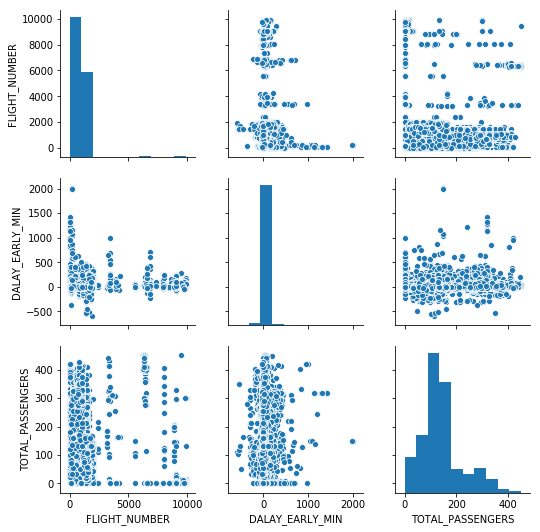

In [9]:
sns.pairplot(df)

## Data Preprocessing steps

In [10]:
# check further the null values in DALAY_EARLY_MIN                
df[df['FLIGHT_STATUS']=='CANCELED']

,TERMINAL,AIRLINE_NAME,AIRLINE_CODE,FLIGHT_NUMBER,ARRIVAL_DEPARTURE,ARRIVAL_DEPARTURE_AIRPORT,DOMESTIC_INTERNATIONAL,SCHEDULED_TIME_ARR_DEP,ACTUAL_TIME_ARR_DEP,DALAY_EARLY_MIN,FLIGHT_STATUS,TOTAL_PASSENGERS
12689,T5,FLYNAS,XY,149,DEPARTURE,ABT - AL-BAHA - SAUDI ARABIA,DOMESTIC,8-12-17 9:30 AM,NaN,NaN,CANCELED,151
27924,T5,SAUDI AIRLINES,SV,1018,ARRIVAL,JED - JEDDAH - SAUDI ARABIA,DOMESTIC,8-16-17 7:40 AM,NaN,NaN,CANCELED,245


In [11]:
# delete the rows where 'FLIGHT_STATUS' is'CANCELED'
df.drop([12689,27924],inplace =True)

In [12]:
# overview data
df.describe()

,FLIGHT_NUMBER,DALAY_EARLY_MIN,TOTAL_PASSENGERS
count,31531.000000,31531.000000,31531.000000
mean,864.703688,16.093305,141.847483
std,998.942303,58.148204,79.596609
min,5.000000,-586.000000,0.000000
25%,210.000000,-8.000000,97.000000
50%,709.000000,10.000000,131.000000
75%,1272.000000,26.000000,164.000000
max,9903.000000,2018.000000,450.000000


In [13]:
# check type of features(columns)
print (df.info())
print(df.dtypes)
print('========================================================')
print(df.AIRLINE_NAME.nunique())
print('========================================================')




#check unique values 
print(df.TERMINAL.unique())
print('========================================================')
print(df.AIRLINE_NAME.unique())
print('========================================================')
print(df.ARRIVAL_DEPARTURE_AIRPORT.unique())
print('========================================================')
df.ARRIVAL_DEPARTURE.unique()
print('========================================================')
print(df.DOMESTIC_INTERNATIONAL.unique())
print('========================================================')
print(df.FLIGHT_STATUS.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31531 entries, 0 to 31532
Data columns (total 12 columns):
TERMINAL                     31531 non-null object
AIRLINE_NAME                 31531 non-null object
AIRLINE_CODE                 30709 non-null object
FLIGHT_NUMBER                31531 non-null int64
ARRIVAL_DEPARTURE            31531 non-null object
ARRIVAL_DEPARTURE_AIRPORT    31531 non-null object
DOMESTIC_INTERNATIONAL       31531 non-null object
SCHEDULED_TIME_ARR_DEP       31531 non-null object
ACTUAL_TIME_ARR_DEP          31531 non-null object
DALAY_EARLY_MIN              31531 non-null float64
FLIGHT_STATUS                31531 non-null object
TOTAL_PASSENGERS             31531 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.1+ MB
None
TERMINAL                      object
AIRLINE_NAME                  object
AIRLINE_CODE                  object
FLIGHT_NUMBER                  int64
ARRIVAL_DEPARTURE             object
ARRIVAL_DEPARTURE_AIRPORT   

In [14]:
# Drop uneeded columns 
#'AIRLINE_CODE' and 'FLIGHT_NUMBER'
df.drop(columns=['AIRLINE_CODE','FLIGHT_NUMBER'],inplace=True)

In [15]:
df.head()

,TERMINAL,AIRLINE_NAME,ARRIVAL_DEPARTURE,ARRIVAL_DEPARTURE_AIRPORT,DOMESTIC_INTERNATIONAL,SCHEDULED_TIME_ARR_DEP,ACTUAL_TIME_ARR_DEP,DALAY_EARLY_MIN,FLIGHT_STATUS,TOTAL_PASSENGERS
0,T2,SAUDI AIRLINES,ARRIVAL,BAH - MANAMA - BAHRAIN,INTERNATIONAL,8-19-17 7:15 PM,8-19-17 6:58 PM,-17.0,ON-TIME,150
1,T2,SAUDI AIRLINES,ARRIVAL,DXB - DUBAI - UNITED ARAB EMIRATES,INTERNATIONAL,8-19-17 7:15 PM,8-19-17 6:49 PM,-26.0,ON-TIME,263
2,T1,EMIRATES AIRLINE,ARRIVAL,DXB - DUBAI - UNITED ARAB EMIRATES,INTERNATIONAL,8-19-17 7:35 PM,8-19-17 7:36 PM,1.0,DELAYED,360
3,T1,GULF AIR,ARRIVAL,BAH - MANAMA - BAHRAIN,INTERNATIONAL,8-19-17 8:30 PM,8-19-17 8:14 PM,-16.0,ON-TIME,138
4,T1,EGYPT AIR,ARRIVAL,CAI - CAIRO - EGYPT,INTERNATIONAL,8-19-17 9:00 PM,8-19-17 9:29 PM,29.0,DELAYED,290


In [16]:
# for ARRIVAL_DEPARTURE_AIRPORT we need only airport or the city in it

%time


df['City'] = df['ARRIVAL_DEPARTURE_AIRPORT'].str.split('-', expand=True)[1]

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 16.9 µs


In [17]:
# for ARRIVAL_DEPARTURE_AIRPORT we need only airport or the city in it
df['Country'] = df['ARRIVAL_DEPARTURE_AIRPORT'].str.split('-', expand = True)[2]
# drop the column 'ARRIVAL_DEPARTURE_AIRPORT' since we have the city and country of arriaval/departure
df.drop(columns='ARRIVAL_DEPARTURE_AIRPORT', inplace = True)

In [18]:
df.head()

,TERMINAL,AIRLINE_NAME,ARRIVAL_DEPARTURE,DOMESTIC_INTERNATIONAL,SCHEDULED_TIME_ARR_DEP,ACTUAL_TIME_ARR_DEP,DALAY_EARLY_MIN,FLIGHT_STATUS,TOTAL_PASSENGERS,City,Country
0,T2,SAUDI AIRLINES,ARRIVAL,INTERNATIONAL,8-19-17 7:15 PM,8-19-17 6:58 PM,-17.0,ON-TIME,150,MANAMA,BAHRAIN
1,T2,SAUDI AIRLINES,ARRIVAL,INTERNATIONAL,8-19-17 7:15 PM,8-19-17 6:49 PM,-26.0,ON-TIME,263,DUBAI,UNITED ARAB EMIRATES
2,T1,EMIRATES AIRLINE,ARRIVAL,INTERNATIONAL,8-19-17 7:35 PM,8-19-17 7:36 PM,1.0,DELAYED,360,DUBAI,UNITED ARAB EMIRATES
3,T1,GULF AIR,ARRIVAL,INTERNATIONAL,8-19-17 8:30 PM,8-19-17 8:14 PM,-16.0,ON-TIME,138,MANAMA,BAHRAIN
4,T1,EGYPT AIR,ARRIVAL,INTERNATIONAL,8-19-17 9:00 PM,8-19-17 9:29 PM,29.0,DELAYED,290,CAIRO,EGYPT


In [19]:
# ************************************************************************************
# Delay time as it more than zero it considered delayed. I'll change that to be above 20 mins considered as delayed
# so the range where delay is less than 20 mins is considered on Time flight
df.loc[df['DALAY_EARLY_MIN'] < 20, 'FLIGHT_STATUS'] = 'ON-TIME'
# check 
# df

In [20]:
# df.isnull().sum()
# df.shape

In [21]:
# change the type of columns (Features) to oppropriate type
# check the type of features first
df.dtypes

TERMINAL                   object
AIRLINE_NAME               object
ARRIVAL_DEPARTURE          object
DOMESTIC_INTERNATIONAL     object
SCHEDULED_TIME_ARR_DEP     object
ACTUAL_TIME_ARR_DEP        object
DALAY_EARLY_MIN           float64
FLIGHT_STATUS              object
TOTAL_PASSENGERS            int64
City                       object
Country                    object
dtype: object

In [22]:
# change the type of columns (Features) to oppropriate type
df.SCHEDULED_TIME_ARR_DEP=pd.to_datetime(df.SCHEDULED_TIME_ARR_DEP)
df.ACTUAL_TIME_ARR_DEP=pd.to_datetime(df.ACTUAL_TIME_ARR_DEP)

# Separate the date coulmn into different columns
df['shour']=df.SCHEDULED_TIME_ARR_DEP.dt.hour #s: sheduled
df['sdayofweek']=df.SCHEDULED_TIME_ARR_DEP.dt.dayofweek #s: sheduled
df['sday']=df.SCHEDULED_TIME_ARR_DEP.dt.day #s: sheduled
df['ahour']=df.ACTUAL_TIME_ARR_DEP.dt.hour #a: actual
df['adayofweek']=df.ACTUAL_TIME_ARR_DEP.dt.dayofweek #a: actual
df['aday']=df.ACTUAL_TIME_ARR_DEP.dt.day #a: actual
# day [0]= Monday
# day [6]= Sunday
df.head()

,TERMINAL,AIRLINE_NAME,ARRIVAL_DEPARTURE,DOMESTIC_INTERNATIONAL,SCHEDULED_TIME_ARR_DEP,ACTUAL_TIME_ARR_DEP,DALAY_EARLY_MIN,FLIGHT_STATUS,TOTAL_PASSENGERS,City,Country,shour,sdayofweek,sday,ahour,adayofweek,aday
0,T2,SAUDI AIRLINES,ARRIVAL,INTERNATIONAL,2017-08-19 19:15:00,2017-08-19 18:58:00,-17.0,ON-TIME,150,MANAMA,BAHRAIN,19,5,19,18,5,19
1,T2,SAUDI AIRLINES,ARRIVAL,INTERNATIONAL,2017-08-19 19:15:00,2017-08-19 18:49:00,-26.0,ON-TIME,263,DUBAI,UNITED ARAB EMIRATES,19,5,19,18,5,19
2,T1,EMIRATES AIRLINE,ARRIVAL,INTERNATIONAL,2017-08-19 19:35:00,2017-08-19 19:36:00,1.0,ON-TIME,360,DUBAI,UNITED ARAB EMIRATES,19,5,19,19,5,19
3,T1,GULF AIR,ARRIVAL,INTERNATIONAL,2017-08-19 20:30:00,2017-08-19 20:14:00,-16.0,ON-TIME,138,MANAMA,BAHRAIN,20,5,19,20,5,19
4,T1,EGYPT AIR,ARRIVAL,INTERNATIONAL,2017-08-19 21:00:00,2017-08-19 21:29:00,29.0,DELAYED,290,CAIRO,EGYPT,21,5,19,21,5,19


In [23]:
# here save the dataframe for Tableau

# Dummyfing

In [24]:
# Dummyfy all categorical features in orderd to prepare it for modleing (machine learning)
# cateogrical columns are TERMINAL                   object
# TERMINAL                   object

# AIRLINE_NAME               object
# ARRIVAL_DEPARTURE          object
# DOMESTIC_INTERNATIONAL     object
# FLIGHT_STATUS              object
# City                       object
# Country                    object

dfd = pd.get_dummies(df, columns =['TERMINAL','AIRLINE_NAME', 'ARRIVAL_DEPARTURE','DOMESTIC_INTERNATIONAL',\
                                   'FLIGHT_STATUS','City', 'Country'])
dfd.shape
# 

(31531, 210)

In [25]:
dfd.shape, df.shape

((31531, 210), (31531, 17))

In [26]:
%time #this to check how much time is needed to do the concatination of the 2 data frames

df = pd.concat([df, dfd], axis=1)


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 21.9 µs


In [27]:
df.shape

(31531, 227)

In [28]:
df.columns

Index(['TERMINAL', 'AIRLINE_NAME', 'ARRIVAL_DEPARTURE',
       'DOMESTIC_INTERNATIONAL', 'SCHEDULED_TIME_ARR_DEP',
       'ACTUAL_TIME_ARR_DEP', 'DALAY_EARLY_MIN', 'FLIGHT_STATUS',
       'TOTAL_PASSENGERS', 'City',
       ...
       'Country_ SWITZERLAND', 'Country_ TURKIYE',
       'Country_ UNITED ARAB EMIRATES', 'Country_ UNITED KINGDOM',
       'Country_ UNITED STATES OF AMERICA', 'Country_ VIETNAM',
       'Country_ YEMEN', 'Country_AHSA ', 'Country_BAHA ', 'Country_DAWASER '],
      dtype='object', length=227)

In [29]:
# %%time

# sns.pairplot(df)

In [30]:
%%time

corr= df.corr()
print(corr)

                                   DALAY_EARLY_MIN  TOTAL_PASSENGERS  \
DALAY_EARLY_MIN                           1.000000          0.067342   
TOTAL_PASSENGERS                          0.067342          1.000000   
shour                                     0.008361          0.057839   
sdayofweek                               -0.004896         -0.024745   
sday                                     -0.017303         -0.007176   
ahour                                    -0.016997          0.059593   
adayofweek                                0.002479         -0.026047   
aday                                     -0.016366         -0.006673   
DALAY_EARLY_MIN                           1.000000          0.067342   
TOTAL_PASSENGERS                          0.067342          1.000000   
shour                                     0.008361          0.057839   
sdayofweek                               -0.004896         -0.024745   
sday                                     -0.017303         -0.00

In [31]:
# print(sns.heatmap(corr , annot= True).set_title('Correlation between Feature'))

In [32]:
print(df.corr()['DALAY_EARLY_MIN'])
print(df.dtypes)

                                   DALAY_EARLY_MIN  DALAY_EARLY_MIN
DALAY_EARLY_MIN                           1.000000         1.000000
TOTAL_PASSENGERS                          0.067342         0.067342
shour                                     0.008361         0.008361
sdayofweek                               -0.004896        -0.004896
sday                                     -0.017303        -0.017303
ahour                                    -0.016997        -0.016997
adayofweek                                0.002479         0.002479
aday                                     -0.016366        -0.016366
DALAY_EARLY_MIN                           1.000000         1.000000
TOTAL_PASSENGERS                          0.067342         0.067342
shour                                     0.008361         0.008361
sdayofweek                               -0.004896        -0.004896
sday                                     -0.017303        -0.017303
ahour                                    -0.0169

## Implementations

Now the data is almost ready for machine learnig Algorithms for each approach used, additional preprocessing maight be needed!

## 1.0. Regression 

In the regression approach, I’ve used two algorithms: the linear regression model and the random forest regression algorithm. The justification of using both is to see how a simple regressor performs against a very complicated and powered random forest regressor.

The target feature was set to be `DALAY_EARLY_MIN` feature and then I’ve split the data into training and test sets with the testing set size of 30%. Afterward, using cross-validation with 10 splits.

The metric to be used for regression is the r2 score, we have a good solution as we the score get close to 1.0

In [33]:
# Get all columns (features) names
cols = df.columns.tolist()
cols

['TERMINAL',
 'AIRLINE_NAME',
 'ARRIVAL_DEPARTURE',
 'DOMESTIC_INTERNATIONAL',
 'SCHEDULED_TIME_ARR_DEP',
 'ACTUAL_TIME_ARR_DEP',
 'DALAY_EARLY_MIN',
 'FLIGHT_STATUS',
 'TOTAL_PASSENGERS',
 'City',
 'Country',
 'shour',
 'sdayofweek',
 'sday',
 'ahour',
 'adayofweek',
 'aday',
 'SCHEDULED_TIME_ARR_DEP',
 'ACTUAL_TIME_ARR_DEP',
 'DALAY_EARLY_MIN',
 'TOTAL_PASSENGERS',
 'shour',
 'sdayofweek',
 'sday',
 'ahour',
 'adayofweek',
 'aday',
 'TERMINAL_CT',
 'TERMINAL_T1',
 'TERMINAL_T2',
 'TERMINAL_T3',
 'TERMINAL_T5',
 'AIRLINE_NAME_AEGEAN AIRLINES',
 'AIRLINE_NAME_AIR ARABIA',
 'AIRLINE_NAME_AIR ARABIA EGYPT',
 'AIRLINE_NAME_AIR ARABIA JORDAN',
 'AIRLINE_NAME_AIR BLUE',
 'AIRLINE_NAME_AIR CAIRO',
 'AIRLINE_NAME_AIR FRANCE',
 'AIRLINE_NAME_AIR INDIA',
 'AIRLINE_NAME_AIR INDIA EXPRESS',
 'AIRLINE_NAME_ATLASJET AIRLINES',
 'AIRLINE_NAME_AVIACON ZITOTRANS',
 'AIRLINE_NAME_BIMAN BANGLADESH AIR',
 'AIRLINE_NAME_BRITISH AIRWAYS',
 'AIRLINE_NAME_CARGOLUX AIRLINES INTERNATIONAL',
 'AIRLINE_NAME_CZEC

In [34]:
# Feature selection for Regression analysis
# split data into X and y
X = df.drop(['AIRLINE_NAME','TERMINAL', 'ARRIVAL_DEPARTURE','DOMESTIC_INTERNATIONAL','DALAY_EARLY_MIN',\
             'FLIGHT_STATUS','City','Country','SCHEDULED_TIME_ARR_DEP', 'ACTUAL_TIME_ARR_DEP',\
            'ahour','adayofweek','aday'], axis = 1)
y = df.DALAY_EARLY_MIN



In [35]:
# split data into train and test sets
# seed = 7
# test_size = 0.33
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [36]:
# Create k-Fold cross-validation

from sklearn.model_selection import KFold, cross_val_score , cross_val_predict
kf = KFold(n_splits=10, shuffle=True) # n_splits=10 is imprically recommended
# cv_results = cross_val_score(df,X, y, cv=kf)

In [37]:
## Using Dummy Regressor to get the score of the baseline model

In [38]:
#  build base line model and compare other modles to it

from sklearn.dummy import DummyRegressor

# Create Dummy Regression Always Predicts The Mean Value Of Target

##Create a dummy regressor
dummy_mean = DummyRegressor(strategy='mean')

## "Train" dummy regressor
dummy_mean.fit(X_train, y_train)

# Evaluate Performance Metric
## Get R-squared score
dummy_mean.score(X_test, y_test)

-0.000293636109825135

The metric to be used for regression is the score, we have a good solution as we the score get close to 1.0

### 1.1. Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

# fit a model
lm = LinearRegression()
# lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ('Score: ', model.score(X_test, y_test))
print('r2_score: ', r2_score(y_test, predictions))

MAE: 2015514.7948096825
MSE: 7819032414505434.0
RMSE: 88425292.84376408
Score:  -2341308163896.0854
r2_score:  -2341308163896.0854


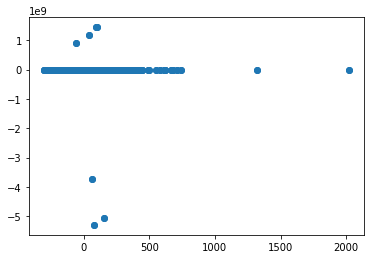

In [40]:
#let plot!
from matplotlib import pyplot as plt

# The line / model
plt.scatter(y_test, predictions)
# plt.xlabel(“True Values”)
# plt.ylabel(“Predictions”)

###  1.2. Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
model = regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy_regr = model.score(X_test,y_test)
print('accuracy for regr = ',accuracy_regr*100,'%')
print('r2_score: ', r2_score(y_test, predictions))

/Users/Abubattal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE: 18.312240838618692
MSE: 1758.1881311137604
RMSE: 41.930754001254975
accuracy for regr =  52.58374764969152 %
r2_score:  0.5258374764969151


## 2.0 Classification
- Determine wether the flight will delay or be on time
- Set `FLIGHT_STATUS` as the target  
- The metric in classification will be the accuracy_score

In [42]:
# I'll encode the Flight status columns to avoid errors later in classification
# To convert categorical features to such integer codes, we can use label encoder.
# This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1):
# since the column `FLIGHT_STATUS` is bianry with 2 values (Delayed or on-time) I'll use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
df['FLIGHT_STATUS']= le.fit_transform(df['FLIGHT_STATUS'].astype('str'))
#check type of column df['FLIGHT_STATUS']
# df['FLIGHT_STATUS']

In [43]:
#classification using data set 
#Importing the required library 

import pandas as pd 
# from sklearn.c import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [44]:
col = df.columns
col.to_list()

['TERMINAL',
 'AIRLINE_NAME',
 'ARRIVAL_DEPARTURE',
 'DOMESTIC_INTERNATIONAL',
 'SCHEDULED_TIME_ARR_DEP',
 'ACTUAL_TIME_ARR_DEP',
 'DALAY_EARLY_MIN',
 'FLIGHT_STATUS',
 'TOTAL_PASSENGERS',
 'City',
 'Country',
 'shour',
 'sdayofweek',
 'sday',
 'ahour',
 'adayofweek',
 'aday',
 'SCHEDULED_TIME_ARR_DEP',
 'ACTUAL_TIME_ARR_DEP',
 'DALAY_EARLY_MIN',
 'TOTAL_PASSENGERS',
 'shour',
 'sdayofweek',
 'sday',
 'ahour',
 'adayofweek',
 'aday',
 'TERMINAL_CT',
 'TERMINAL_T1',
 'TERMINAL_T2',
 'TERMINAL_T3',
 'TERMINAL_T5',
 'AIRLINE_NAME_AEGEAN AIRLINES',
 'AIRLINE_NAME_AIR ARABIA',
 'AIRLINE_NAME_AIR ARABIA EGYPT',
 'AIRLINE_NAME_AIR ARABIA JORDAN',
 'AIRLINE_NAME_AIR BLUE',
 'AIRLINE_NAME_AIR CAIRO',
 'AIRLINE_NAME_AIR FRANCE',
 'AIRLINE_NAME_AIR INDIA',
 'AIRLINE_NAME_AIR INDIA EXPRESS',
 'AIRLINE_NAME_ATLASJET AIRLINES',
 'AIRLINE_NAME_AVIACON ZITOTRANS',
 'AIRLINE_NAME_BIMAN BANGLADESH AIR',
 'AIRLINE_NAME_BRITISH AIRWAYS',
 'AIRLINE_NAME_CARGOLUX AIRLINES INTERNATIONAL',
 'AIRLINE_NAME_CZEC

In [45]:
# Feature selection for Classfication analysis
# split data into X and y
X = df.drop(['AIRLINE_NAME','TERMINAL', 'ARRIVAL_DEPARTURE','DOMESTIC_INTERNATIONAL','DALAY_EARLY_MIN',\
 'DALAY_EARLY_MIN','City','Country','SCHEDULED_TIME_ARR_DEP', 'ACTUAL_TIME_ARR_DEP','FLIGHT_STATUS',\
             'FLIGHT_STATUS_DELAYED','FLIGHT_STATUS_ON-TIME'], axis = 1)
y = df.FLIGHT_STATUS



In [46]:
# I'll use the flight status as the target without the features of 'actual time of arrival or departure  and Delay columns'
# split data into train and test sets
# seed = 7
# test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

## 2.0 Base line model for classification


In [47]:
# Using Dummy Classifiers as Performance Baseline 
# Create dummy classifer

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=1)

# "Train" model
dummy.fit(X_train, y_train)

#Evaluate Performance Metric
# Get accuracy score
dummy.score(X_test, y_test) 

0.6632135306553911

In [48]:
# another method for getting the baseline 
print(df.FLIGHT_STATUS.value_counts())
df.FLIGHT_STATUS.value_counts(normalize=True)

1    21120
0    10411
Name: FLIGHT_STATUS, dtype: int64


1    0.669817
0    0.330183
Name: FLIGHT_STATUS, dtype: float64

In [49]:
# df.head()

## 2.1 Using Random Forest classifier 

In [50]:
classifier=RandomForestClassifier() 
classifier=classifier.fit(X_train,y_train) 
rf_predicted=classifier.predict(X_test) 

/Users/Abubattal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
#printing the results 
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, rf_predicted)) 
print ('Accuracy Score :',accuracy_score(y_test, rf_predicted)) 
print ('Report :') 
print (classification_report(y_test, rf_predicted)) 

Confusion Matrix :
[[2021 1165]
 [ 918 5356]]
Accuracy Score : 0.7798097251585624
Report :
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      3186
           1       0.82      0.85      0.84      6274

   micro avg       0.78      0.78      0.78      9460
   macro avg       0.75      0.74      0.75      9460
weighted avg       0.78      0.78      0.78      9460



## 2.2 Using Logistic Regression model classifer

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
classifier = LogisticRegression()
classifier = classifier.fit(X_train, y_train)
predicted  = classifier.predict(X_test)

/Users/Abubattal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
# printing the results for Logistic Regression Classifier model
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, predicted)) 
print ('Accuracy Score :',accuracy_score(y_test, predicted)) 
print ('Report : ') 
print (classification_report(y_test, predicted)) 

Confusion Matrix :
[[1309 1877]
 [ 692 5582]]
Accuracy Score : 0.7284355179704017
Report : 
              precision    recall  f1-score   support

           0       0.65      0.41      0.50      3186
           1       0.75      0.89      0.81      6274

   micro avg       0.73      0.73      0.73      9460
   macro avg       0.70      0.65      0.66      9460
weighted avg       0.72      0.73      0.71      9460



# Results



#### 1- Regression 
    * Base line model score -0.000293636109825135
    * Linear Regression Model score is -2341308163896.0854 !!
    * Random Forest Regression score 0.5258374764969151
    
    
#### 2- Classification
    * Base line model accuracy score is 0.669817
    * Random Forest classifier score is 0.7798097251585624
    * Logistic Regression model classifer 0.7284355179704017

## Discussion 

- It looks the regression approch does not suit the data. However the Random Forest regressor out perform linear regression and baseline model. The linear regression values are off which indicates that there is no linear realationship between the features and target feature.



- Classification is a better approach whith an acceptable accuracy score. Best accuracy score was obtained by the random forest classifier which out perform the logistic regression classifier. 


## Impact of the analysis results!
Imagine how helpful it is for airports to know which flight will delay or not in advance based on previously trained datasets. This will be very informative and will surely help them to prepare their facilities and staff and act early by improving their services and manage their internal resources properly. Doing that will enhance the overall individuals’ experience and make them avoid any disappointment that may come with flight delays
## Challenges
Many challenging issues were faced during doing this project. Starting from getting the data and later cleaning and wrangling the data. For example, most of the features were Categorical had to dummyfy them all which increased the features and hence increasing the running time for the code.
## Future Work
- Deploy the model and see it perform against a recent set of data
- Get more meaningful features that will improve the regression approach and also the classification approach